In [1]:
# Import required libraries
import os

import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Load environment variables
load_dotenv()

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load and Explore Data

In [2]:
# Load data
data_path = "../data/raw/sentiment_data.csv"

if not os.path.exists(data_path):
    print(f"Data file not found at {data_path}")
    print("Please run: python src/generate_data.py")
else:
    df = pd.read_csv(data_path)
    print(f"Loaded {len(df)} samples")
    print(f"\nDataset shape: {df.shape}")
    print(f"\nColumns: {df.columns.tolist()}")
    display(df.head())

Loaded 1000 samples

Dataset shape: (1000, 2)

Columns: ['text', 'sentiment']


,text,sentiment
0,So rad! This case rocks!,positive
1,Horrible experience with this keyboard. Very p...,negative
2,Worst backpack ever. Total disappointment.,negative
3,The stand is incredible. Best decision ever!,positive
4,Really impressed with this case. Great value!,positive


Missing values:
text         0
sentiment    0
dtype: int64

Class distribution:
sentiment
negative    334
positive    333
neutral     333
Name: count, dtype: int64


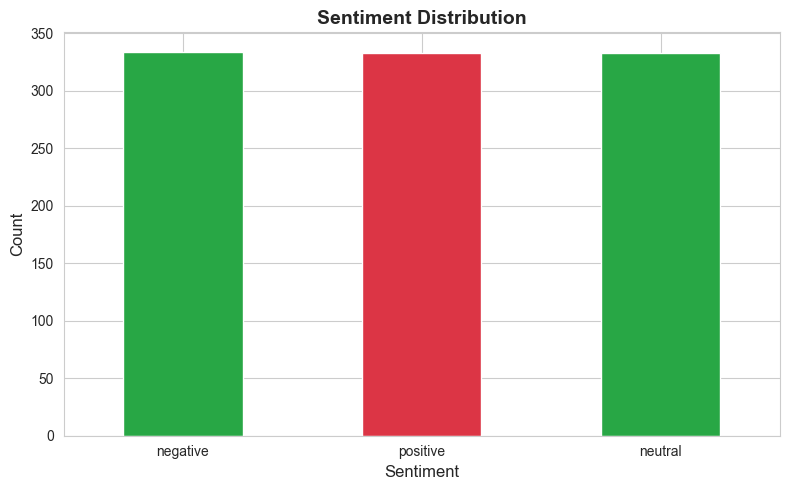

In [3]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check class distribution
print("\nClass distribution:")
print(df['sentiment'].value_counts())

# Visualize class distribution
plt.figure(figsize=(8, 5))
df['sentiment'].value_counts().plot(kind='bar', color=['#28a745', '#dc3545'])
plt.title('Sentiment Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [4]:
# Sample texts
print("Sample positive texts:")
for text in df[df['sentiment'] == 'positive']['text'].head(3):
    print(f"  - {text}")

print("\nSample negative texts:")
for text in df[df['sentiment'] == 'negative']['text'].head(3):
    print(f"  - {text}")

Sample positive texts:
  - So rad! This case rocks!
  - The stand is incredible. Best decision ever!
  - Really impressed with this case. Great value!

Sample negative texts:
  - Horrible experience with this keyboard. Very poor!
  - Worst backpack ever. Total disappointment.
  - The case broke after one day. Horrible!


## 2. Prepare Data for Training

In [5]:
# Split features and labels
X = df['text']
y = df['sentiment']

# Split into train and test sets
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"\nTrain class distribution:\n{y_train.value_counts()}")
print(f"\nTest class distribution:\n{y_test.value_counts()}")

Training samples: 800
Test samples: 200

Train class distribution:
sentiment
negative    267
positive    267
neutral     266
Name: count, dtype: int64

Test class distribution:
sentiment
neutral     67
negative    67
positive    66
Name: count, dtype: int64


## 3. Build and Train Model

In [6]:
# Create pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,
        ngram_range=(1, 2),
        stop_words='english'
    )),
    ('classifier', LogisticRegression(
        random_state=random_state,
        max_iter=1000
    ))
])

print("Training model...")
pipeline.fit(X_train, y_train)
print("Training complete!")

Training model...
Training complete!


## 4. Evaluate Model

In [7]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        67
     neutral       1.00      1.00      1.00        67
    positive       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



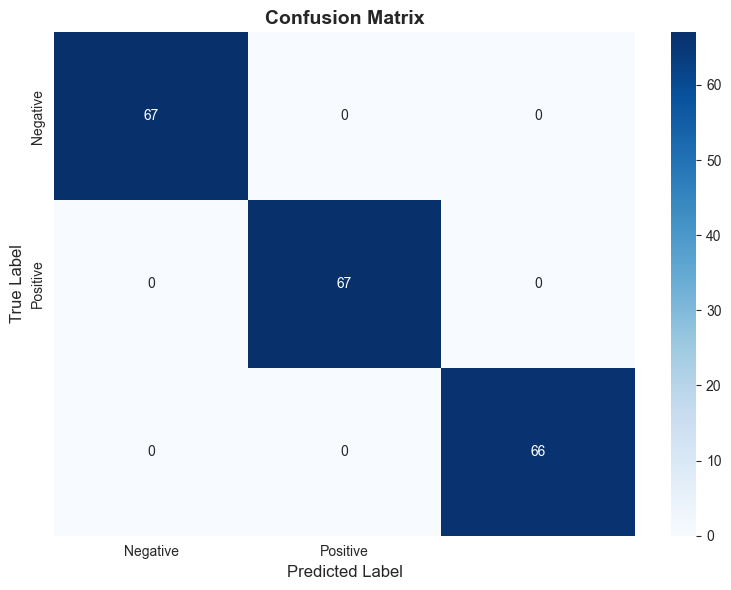

In [8]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

## 5. Test Model with Custom Examples

In [9]:
# Test with custom examples
test_texts = [
    "This is the best product I've ever bought!",
    "Terrible quality. Would not recommend.",
    "Amazing experience! Love it!",
    "Waste of money. Very disappointed.",
    "Excellent service and great value!"
]

predictions = pipeline.predict(test_texts)
probabilities = pipeline.predict_proba(test_texts)

print("Custom Test Results:")
print("=" * 80)
for text, pred, proba in zip(test_texts, predictions, probabilities, strict=False):
    confidence = max(proba) * 100
    print(f"\nText: {text}")
    print(f"Prediction: {pred.upper()} (Confidence: {confidence:.1f}%)")

Custom Test Results:

Text: This is the best product I've ever bought!
Prediction: POSITIVE (Confidence: 86.4%)

Text: Terrible quality. Would not recommend.
Prediction: NEGATIVE (Confidence: 89.9%)

Text: Amazing experience! Love it!
Prediction: POSITIVE (Confidence: 84.9%)

Text: Waste of money. Very disappointed.
Prediction: NEGATIVE (Confidence: 89.4%)

Text: Excellent service and great value!
Prediction: POSITIVE (Confidence: 81.5%)


## 6. Save Model

In [10]:
# Save model
model_path = "../models/sentiment_model.pkl"
os.makedirs("../models", exist_ok=True)

joblib.dump(pipeline, model_path)
print(f"Model saved to {model_path}")

# Verify model file size
file_size = os.path.getsize(model_path) / (1024 * 1024)
print(f"Model file size: {file_size:.2f} MB")

Model saved to ../models/sentiment_model.pkl
Model file size: 0.06 MB


## 7. Model Summary

In [11]:
print("MODEL SUMMARY")
print("=" * 80)
print("Algorithm: Logistic Regression with TF-IDF")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Accuracy: {accuracy:.4f}")
print("Max features: 5000")
print("N-gram range: (1, 2)")
print(f"Model saved: {model_path}")
print("=" * 80)

MODEL SUMMARY
Algorithm: Logistic Regression with TF-IDF
Training samples: 800
Test samples: 200
Accuracy: 1.0000
Max features: 5000
N-gram range: (1, 2)
Model saved: ../models/sentiment_model.pkl
